In [1]:
from data.db_model import *
from data.feature_eng.repetitiveness import * 

# from data.master import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as pyplot

engine = create_engine('sqlite:///data/hiphop_rec.db')
session = Session(bind=engine)

In [3]:
from visuals.visualize_scripts import *

In [7]:
df_artists = pd.read_sql('artists', engine)
df_albums = pd.read_sql('albums', engine)
df_songs = pd.read_sql('songs', engine)
df_spotify = pd.read_sql('spotify_song_data', engine)
df_songs_merged = pd.merge(df_songs, df_albums, left_on = 'album_id', right_on = 'id')

In [8]:
df_songs_albums_merged = pd.merge(df_songs, df_albums, left_on = 'album_id', right_on = 'id')
df_songs_merged = pd.merge(df_songs_albums_merged, df_artists, left_on='artist_id', right_on = 'id')
df_songs_merged.columns = ['song_id', 'song_name', 'album_id', 'all_lyrics', 'artist_lyrics',
       'repetitiveness', 'topic', 'rhyme', 'album_id_x', 'album_name', 'artist_id', 'release_date',
        'artist_id_x', 'artist_name', 'decade']
df_songs_merged = df_songs_merged.drop(columns=['album_id_x', 'artist_id_x'])
df_songs_merged_spotify = pd.merge(df_songs_merged, df_spotify, left_on='song_id', right_on = 'song_id')

df_songs_merged['repetitiveness'] = df_songs['repetitiveness'].apply(lambda x: float(x))
df_songs_merged_spotify['repetitiveness'] = df_songs_merged_spotify['repetitiveness'].apply(lambda x: float(x))
df_songs_merged['count'] = 1
df_songs_merged_spotify['count'] = 1

In [ ]:
create_spotify_plot(df_songs_merged_spotify, 'speechiness')

In [9]:
create_topic_plot(df_songs_merged)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

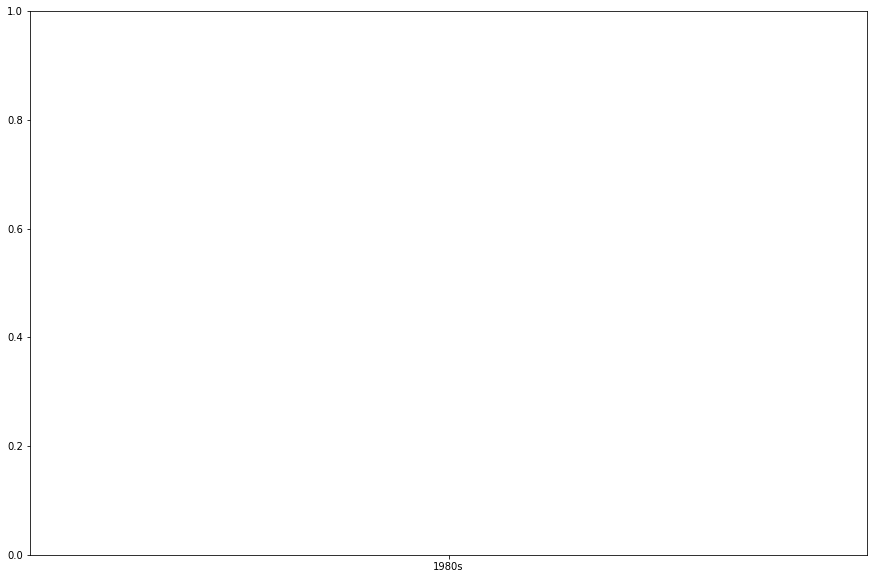

In [10]:
fig, ax = pyplot.subplots(figsize=(15,10))
ax.bar(['1980s', '1990s', '2000s', '2010s'],
           height=df_songs_merged.groupby('decade').mean()['repetitiveness'], 
           color=['#604860', '#ffdb58', '#F46D25', '#fb9fa4'])
ax.set_ylabel('Average Repetitiveness for Decade', fontsize=14)
ax.set_title('Repetitiveness By Decade', fontsize=20)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

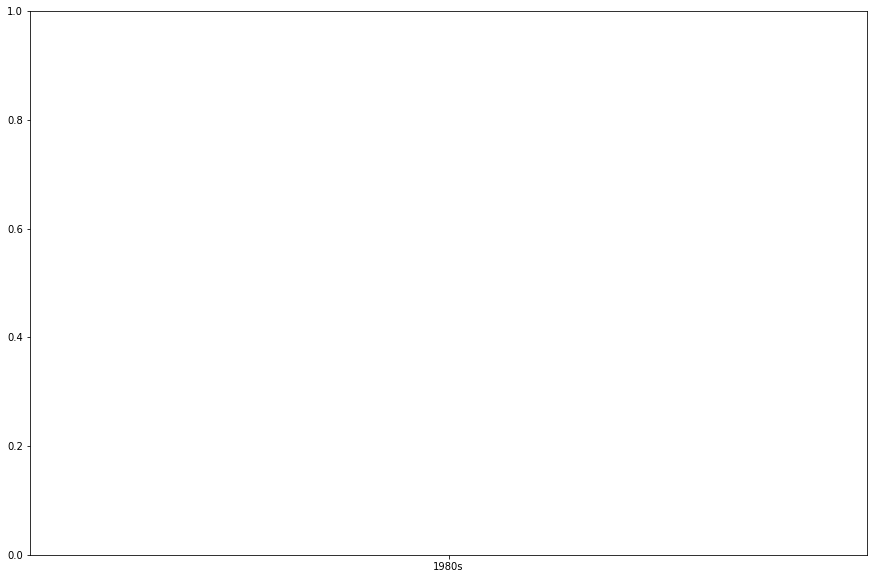

In [11]:
fig, ax = pyplot.subplots(figsize=(15,10))
ax.bar(['1980s', '1990s', '2000s', '2010s'],
           height=df_songs_merged.groupby('decade').mean()['rhyme'], 
           color=['#604860', '#ffdb58', '#F46D25', '#fb9fa4'])
ax.set_ylabel('Average Rhyme Score for Decade', fontsize=14)
ax.set_title('Rhyme Score By Decade', fontsize=20)

In [345]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [409]:
import seaborn as sns
import matplotlib.pyplot as pyplt
from mpl_toolkits.mplot3d import Axes3D

In [410]:
X = df_songs_merged_spotify.drop(columns=['id', 'rhyme', 'decade', 'release_date', 'artist_name', 'song_id', 'song_name', 'album_id', 'album_name', 'all_lyrics', 'artist_lyrics', 'artist_id'])

kmeans = KMeans(n_clusters=5) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

pca = PCA(n_components=3).fit(X)
pca_2d = pca.transform(X)
df_PCA = pd.DataFrame(pca_2d)
df_PCA['subgenre'] = kmeans.predict(X)

In [403]:
# df_PCA_feat = df_PCA

# pca = PCA(n_components=3).fit(df_PCA_feat)
# pca_2d = pca.transform(df_PCA_feat)

# kmeans = KMeans(n_clusters=5) 
# kmeans.fit(df_PCA_feat)

# df_PCA_feat['subgenre'] = kmeans.predict(df_PCA_feat)

In [408]:
df_PCA['subgenre'] = df_songs_merged_spotify['subgenre']

In [374]:
# pyplot.figure(figsize=(10,10))
# ax = sns.scatterplot(x=0, y=1, hue="subgenre",
#                      data=df_PCA, legend='full')

In [411]:
c_map = {0: 'b', 1: 'r', 2:'g', 3:'m', 4:'y', 5:'c'}


Text(0.5, 0.92, 'Clustering Hip Hop Genres')

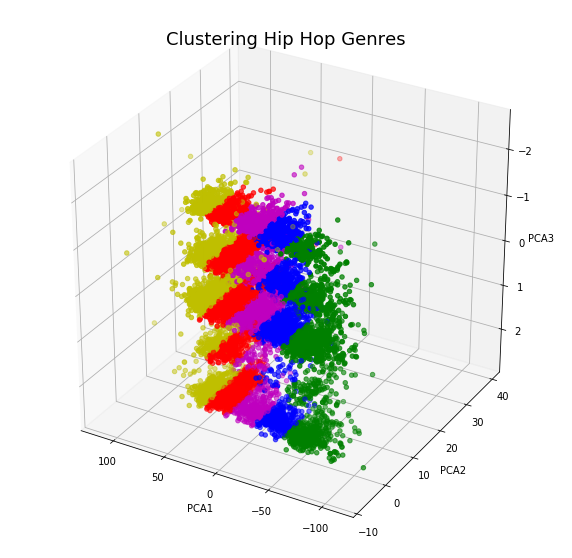

In [420]:
threedee = pyplt.figure(figsize=(10,10)).gca(projection='3d')
threedee.scatter(df_PCA_feat[0], df_PCA_feat[1], df_PCA_feat[2], c=[c_map[_] for _ in df_PCA_feat['subgenre']])
threedee.view_init(210,60)
threedee.set_xlabel('PCA1')
threedee.set_ylabel('PCA2')
threedee.set_zlabel('PCA3')
threedee.set_title('Clustering Hip Hop Genres', fontsize=18)